# Baseline Model Building

## Objective
This notebook builds and compares multiple baseline machine learning models
to predict whether a book is likely to be liked by users.
The goal is to establish a benchmark before applying advanced optimization.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/processed/books_features.csv"
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,bookId,title,author,series,description,genres,awards,characters,places,...,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5,popularity_score,rating_category,liked
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",...,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0,67.421832,High,1
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0,66.523668,High,1
2,2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter #1,Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",...,117823.0,4.48,126344.0,147184.0,627803.0,1694206.0,4839246.0,70.881127,High,1
3,3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,Harry Potter #2,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",...,55839.0,4.43,15623.0,55060.0,315917.0,787181.0,1704415.0,65.885949,High,1
4,4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré",Harry Potter #3,"For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Best Work for Young Read...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,58483.0,4.57,14124.0,29105.0,214151.0,701765.0,2013374.0,68.115487,High,1


In [3]:
features = [
    'avg_rating',
    'num_ratings',
    'num_reviews',
    'num_pages',
    'popularity_score'
]

X = df[features]
y = df['liked']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (16054, 5)
Test size: (4014, 5)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

log_acc = accuracy_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, y_prob_log)

log_acc, log_auc

(0.9892874937717987, 0.999718443126023)

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_prob_dt)

dt_acc, dt_auc

(1.0, 1.0)

In [8]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)

rf_acc, rf_auc

(1.0, 1.0)

In [9]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [log_acc, dt_acc, rf_acc],
    "ROC-AUC": [log_auc, dt_auc, rf_auc]
})

comparison_df

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.989287,0.999718
1,Decision Tree,1.000000,1.000000
2,Random Forest,1.000000,1.000000


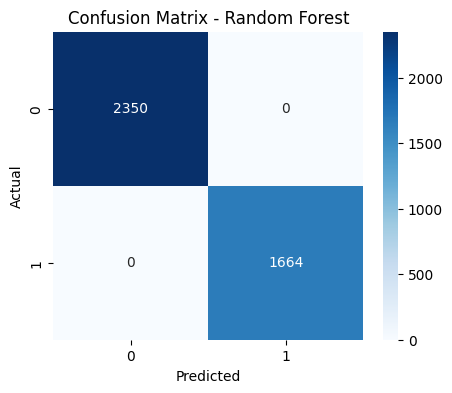

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
0,avg_rating,0.945569
4,popularity_score,0.030480
1,num_ratings,0.016603
3,num_pages,0.005430
2,num_reviews,0.001919
